In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from utils.data_ingestion_load_data import (
    load_main_data,
    build_data_columns,
    set_muni_index,
)
from utils.japan_area_names import cities_jp_to_en, prefecture_dict_jp_to_en
from utils.fig_handler import init_savefig, HandlerValue

In [3]:
# load config
if os.path.exists("config.json"):
	with open("config.json") as config_file:
		config = json.load(config_file)
else:
	config = dict()

# set the save parameters
save_flag = bool(config.get('save_fig_flag', False))
base_folder = config.get('save_fig_loc', None)
savefig = init_savefig(save_flag, base_folder)	

# load the main data
df = load_main_data()
data_columns = build_data_columns(df)

# translate and set index
df['muni'] = df['muni'].map(cities_jp_to_en)
df['pref'] = df['pref'].map(prefecture_dict_jp_to_en)
df = df.set_index(['pref', 'muni'])


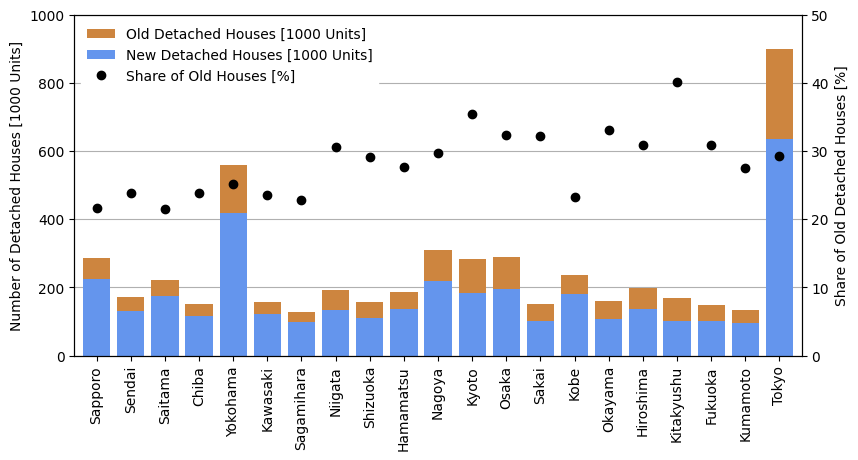

In [4]:
# ============================================================================ #
# Share of Old Houses
# ============================================================================ #

fig, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()

colors = ["cornflowerblue", "peru"]
dhouse_stats = df.filter(like="dhouse_").reset_index()
dhouse_stats["old_share"] = (
    100 * dhouse_stats["dhouse_old"] / dhouse_stats["dhouse_total"]
)
dhouse_stats = set_muni_index(dhouse_stats)
dhouse_stats[["dhouse_new", "dhouse_old"]].div(1_000).plot(
    ax=ax, kind="bar", stacked=True, width=0.8, color=colors
)

# ax
ax.set_ylabel("Number of Detached Houses [1000 Units]")
ax.set_ylim(0, 1000)
ax.set_xlabel("")
ax.grid(axis="y")
ax.set_axisbelow(True)

# ax2
ax2 = ax.twinx()
dhouse_stats["old_share"].plot(ax=ax2, lw=0, marker="o", color="k")
ax2.set_ylim(0, 50)
ax2.set_ylabel("Share of Old Detached Houses [%]")

# legend
# Get handles and labels from both axes
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

# Merge handles and labels
handles = handles_ax[::-1] + handles_ax2
labels = labels_ax[::-1] + labels_ax2

rename_cols = {
    "dhouse_old": "Old Detached Houses [1000 Units]",
    "dhouse_new": "New Detached Houses [1000 Units]",
    "old_share": "Share of Old Houses [%]",
}
labels = [rename_cols.get(l, l) for l in labels]

# Create a single legend for both plots
ax.legend(handles, labels, loc="upper left", edgecolor="white", framealpha=1)

savefig(fig, "number_of_detached_houses.pdf", dpi=300)

In [5]:
# ============================================================================ #
# Average Rooftop Solar PV Capacity
# ============================================================================ #

df_temp1 = df[data_columns.rpv_cap].copy()
df_temp1.columns = [c.split("_")[-1] for c in df_temp1.columns]
df_temp2 = df[data_columns.rpv_no].copy()
df_temp2.columns = [c.split("_")[-1] for c in df_temp2.columns]

round(df_temp1/df_temp2,2).reset_index()

,pref,muni,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Hokkaido,Sapporo,3.93,4.03,4.09,4.11,4.16,4.27,4.37,4.50,4.62,4.73
1,Miyagi,Sendai,3.97,4.01,4.05,4.09,4.13,4.17,4.20,4.23,4.30,4.34
2,Saitama,Saitama,3.92,3.99,4.03,4.08,4.11,4.15,4.19,4.21,4.22,4.18
3,Chiba,Chiba,3.96,4.02,4.09,4.14,4.19,4.25,4.29,4.35,4.41,4.43
4,Kanagawa,Yokohama,3.64,3.69,3.76,3.80,3.82,3.87,3.91,3.95,3.98,3.99
5,Kanagawa,Kawasaki,3.74,3.80,3.84,3.88,3.90,3.91,3.96,3.99,4.00,3.95
6,Kanagawa,Sagamihara,3.89,3.97,4.04,4.10,4.13,4.17,4.22,4.26,4.31,4.33
7,Niigata,Niigata,4.03,4.12,4.20,4.28,4.35,4.40,4.43,4.50,4.56,4.61
8,Shizuoka,Shizuoka,4.04,4.08,4.13,4.16,4.19,4.23,4.28,4.33,4.39,4.44
9,Shizuoka,Hamamatsu,4.18,4.23,4.29,4.33,4.35,4.39,4.44,4.51,4.59,4.66


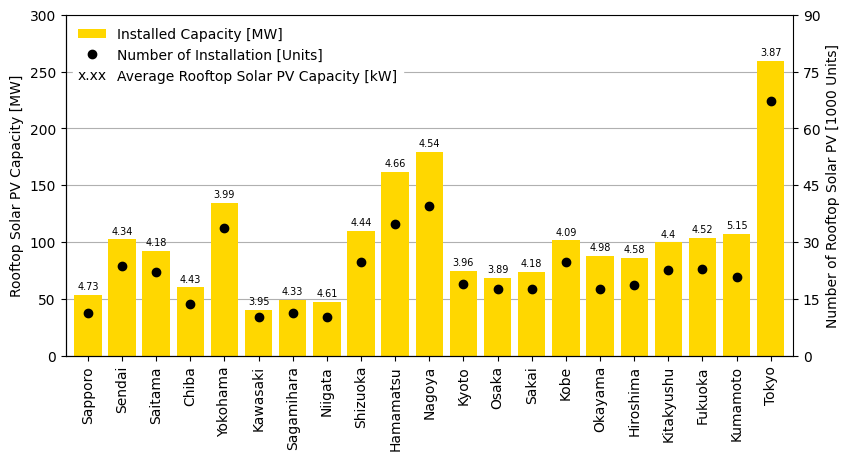

In [6]:
# ============================================================================ #
# Understand Current Capacity; Highlight average capacity
# ============================================================================ #

fig, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()

# Prepare the data
rpv_current = df[["rpv_cap_2023", "rpv_no_2023"]].rename(
    columns={"rpv_cap_2023": "rpv_cap", "rpv_no_2023": "rpv_no"}
)
rpv_current = set_muni_index(rpv_current)

# Plot the rooftop solar PV capacity
rpv_current["rpv_cap"].div(1_000).plot(
    ax=ax, kind="bar", stacked=True, width=0.8, color="gold"
)
ax.set_ylabel("Rooftop Solar PV Capacity [MW]")
ax.set_xlabel("")
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0, 300)

# Plot the number of rooftop solar PV installations
ax2 = ax.twinx()
rpv_current["rpv_no"].div(1_000).plot(ax=ax2, lw=0, marker="o", color="k")
ax2.set_ylim(0, 90)
ax2.set_yticks(range(0, 91, 15))
ax2.set_ylabel("Number of Rooftop Solar PV [1000 Units]")

# Annotate the plot with average rooftop size
rpv_mean_size = (rpv_current["rpv_cap"] / rpv_current["rpv_no"]).round(2)
for x, y in enumerate(rpv_current["rpv_cap"].div(1_000)):
    ax.text(
        x,
        y + 3,
        f"{rpv_mean_size.iloc[x]}",
        ha="center",
        va="bottom",
        color="k",
        fontsize=7,
    )

# legend
# Get handles and labels from both axes
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

# Merge handles and labels
handles = handles_ax + handles_ax2
labels = labels_ax + labels_ax2

rename_cols = {
    "rpv_cap": "Installed Capacity [MW]",
    "rpv_no": "Number of Installation [Units]",
}
labels = [rename_cols.get(l, l) for l in labels]

# Penetration rate handlxs
handler_map = {None: HandlerValue("x.xx")}
handles.append(None)
labels.append("Average Rooftop Solar PV Capacity [kW]")

# Create a single legend for both plots
ax.legend(
    handles,
    labels,
    loc="upper left",
    edgecolor="white",
    framealpha=1,
    handler_map=handler_map,
)

# Save the figure
savefig(fig, "rooftop_solar_pv_cap_current.pdf", dpi=300)

In [7]:
# ============================================================================ #
# Calculate PV capacity
# ============================================================================ #

rpv_potential = df["rpv_cap_2023"].to_frame()
rpv_potential["detach_rpv_cap_new"] = (
    df["dhouse_new"] - df["rpv_no_2023"]
) * 4
rpv_potential["detach_rpv_cap_old"] = df["dhouse_old"] * 4
rpv_potential = set_muni_index(rpv_potential)
rpv_potential.index.name=None
rpv_potential.to_csv('data/gen/rpv_capacity_potential.csv')

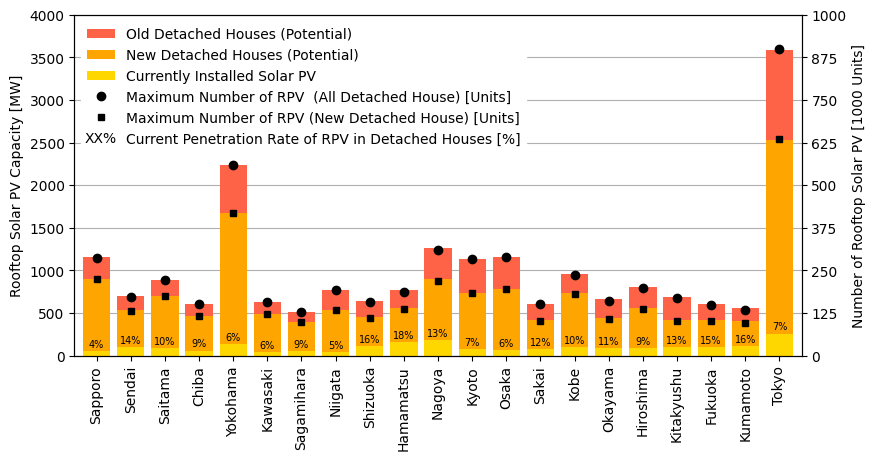

In [8]:
# Prepare data for detached house counts
dhouse_count = df[["dhouse_new", "dhouse_total"]]
dhouse_count = set_muni_index(dhouse_count)

# Create subplots
fig, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()

# Plot rooftop solar PV capacity
colors = ["gold", "orange", "tomato"]
rpv_potential.div(1_000).plot(ax=ax, kind="bar", stacked=True, width=0.8, color=colors)

# Configure primary y-axis for PV capacity
ax.set_ylabel("Rooftop Solar PV Capacity [MW]")
ax.set_xlabel("")
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.set_ylim(0, 4000)

# Create a secondary y-axis for detached house counts
ax2 = ax.twinx()

# Plot total and new detached houses
markers = {"dhouse_total": "o", "dhouse_new": "s"}
for col, marker in markers.items():
    dhouse_count[col].div(1_000).plot(
        ax=ax2,
        lw=0,
        marker=marker,
        color="k",
        markersize=4 if col == "dhouse_new" else 6,
    )

ax2.set_ylim(0, 1000)
ax2.set_yticks(range(0, 1001, 125))
ax2.set_ylabel("Number of Rooftop Solar PV [1000 Units]")

# Calculate and annotate penetration rate
current_penerate = (
    (
        100
        * set_muni_index(df["rpv_no_2023"])["rpv_no_2023"]
        / dhouse_count["dhouse_total"]
    )
    .round(0)
    .astype(int)
).to_dict()

for x, (name, val) in enumerate(rpv_potential["rpv_cap_2023"].items()):
    y = val / 1_000
    ax.text(
        x,
        y + 20,
        f"{current_penerate.get(name, '')}%",
        ha="center",
        va="bottom",
        color="k",
        fontsize=7,
    )

# Get handles and labels from both axes
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

# Merge handles and labels
handles = handles_ax[::-1] + handles_ax2
labels = labels_ax[::-1] + labels_ax2

rename_cols = {
    "detach_rpv_cap_new": "New Detached Houses (Potential)",
    "detach_rpv_cap_old": "Old Detached Houses (Potential)",
    "dhouse_total": "Maximum Number of RPV  (All Detached House) [Units]",
    "dhouse_new": "Maximum Number of RPV (New Detached House) [Units]",
    "rpv_cap_2023": "Currently Installed Solar PV",
}
labels = [rename_cols.get(l, l) for l in labels]

# Penetration rate handles
handler_map = {None: HandlerValue("XX%")}
handles.append(None)
labels.append("Current Penetration Rate of RPV in Detached Houses [%]")

# Create a single legend for both plots
ax.legend(
    handles,
    labels,
    loc="upper left",
    edgecolor="white",
    framealpha=1,
    handler_map=handler_map,
)

savefig(fig, "rooftop_solar_pv_cap_potential.pdf", dpi=300)

In [9]:
# ============================================================================ #
# Battery Storage
# ============================================================================ #

battery_mean_capacity = 8  # kWh Usable
battery_potential = (df["rpv_no_2023"] * battery_mean_capacity).to_frame("bat_cap_2023")

battery_potential["detach_bat_cap_new"] = (
    df["dhouse_new"] - df["rpv_no_2023"]
) * battery_mean_capacity

battery_potential["detach_bat_cap_old"] = df["dhouse_old"] * battery_mean_capacity
battery_potential = set_muni_index(battery_potential)
battery_potential.index.name = None
battery_potential.to_csv("data/gen/bat_capacity_potential.csv")
battery_potential

,bat_cap_2023,detach_bat_cap_new,detach_bat_cap_old
Sapporo,90664,1703736,497600
Sendai,188840,867960,330400
Saitama,175728,1217072,381600
Chiba,108744,810456,288000
Yokohama,269832,3071768,1126400
Kawasaki,81488,888112,299200
Sagamihara,90424,701576,234400
Niigata,81864,980536,468800
Shizuoka,198400,692800,367200
Hamamatsu,277176,806824,414400


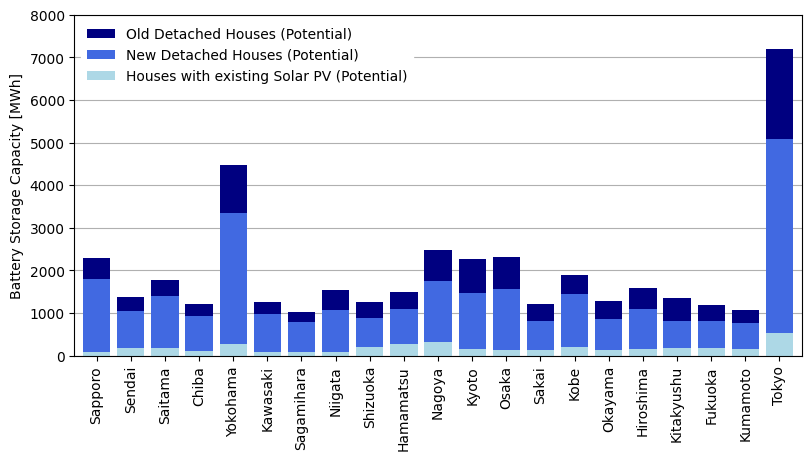

In [10]:
# Prepare data for detached house counts
dhouse_count = df[["dhouse_new", "dhouse_total"]]
dhouse_count = set_muni_index(dhouse_count)

# Create subplots
fig, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()

# Plot rooftop solar PV capacity
colors = ["lightblue", "royalblue", "navy"]
battery_potential.div(1_000).plot(
    ax=ax, kind="bar", stacked=True, width=0.8, color=colors
)

# Configure primary y-axis for PV capacity
ax.set_ylabel("Battery Storage Capacity [MWh]")
ax.set_xlabel("")
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.set_ylim(0, 8000)

# Calculate and annotate penetration rate
current_penerate = (
    (
        100
        * set_muni_index(df["rpv_no_2023"])["rpv_no_2023"]
        / dhouse_count["dhouse_total"]
    )
    .round(0)
    .astype(int)
).to_dict()


# Get handles and labels from both axes
handles_ax, labels_ax = ax.get_legend_handles_labels()
# handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

# Merge handles and labels
handles = handles_ax[::-1]  # + handles_ax2
labels = labels_ax[::-1]  # + labels_ax2

rename_cols = {
    "detach_bat_cap_new": "New Detached Houses (Potential)",
    "detach_bat_cap_old": "Old Detached Houses (Potential)",
    "dhouse_total": "Maximum Number of RPV  (All Detached House) [Units]",
    "dhouse_new": "Maximum Number of RPV (New Detached House) [Units]",
    "bat_cap_2023": "Houses with existing Solar PV (Potential)",
}
labels = [rename_cols.get(l, l) for l in labels]

# Create a single legend for both plots
ax.legend(
    handles,
    labels,
    loc="upper left",
    edgecolor="white",
    framealpha=1,
    handler_map=handler_map,
)

savefig(fig, "battery_storage_cap_potential.pdf", dpi=300)